In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()

import numpy as np
import math

In [2]:
def show_heatmaps(df, x, y, z, vmin=0.85, vmax=0.9):
    z_vals = df[z].unique()
    
    if len(z_vals) == 1:
        selection = df.pivot(x, y, 'val_score')
        sns.heatmap(selection, vmin=vmin, vmax=vmax).set_title('{}: {}'.format(z, z_vals[0]))
        return
    
    num_rows = math.ceil(len(z_vals) / 3.)
    f, axes = plt.subplots(num_rows, 3, figsize=(12,num_rows*4))
    plt.subplots_adjust(wspace=1.0, hspace=1.0)
    
    for i in range(num_rows):
        for j in range(3):
            
            if i*3+j > (len(z_vals) - 1):
                break

            z_val = z_vals[i*3+j]
            
            selection = df[df[z] == z_val]

            #print('{}: {}'.format(z, z_val))
            #print(selection[[x, y, 'val_score']].head())
            selection = selection.pivot(x, y, 'val_score')
            
            sns.heatmap(selection, vmin=vmin, vmax=vmax, ax=axes[i,j]).set_title('{}: {}'.format(z, z_val))

In [3]:
def linear(x):
    return x

In [4]:
def show_3d_heatmap(df, x, y, z, x_scale=linear, y_scale=linear, z_scale=linear):
    fig = plt.figure()

    ax = plt.axes(projection='3d')

    # Data for three-dimensional scattered points
    xs = x_scale(df[x].values)
    ys = y_scale(df[y].values)
    zs = z_scale(df[z].values)
    scores = df['val_score'].values
    scatterplot = ax.scatter3D(xs, ys, zs, c=scores, cmap='Reds')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    cbar = ax.figure.colorbar(scatterplot, ax=ax, cmap="Reds")
    cbar.ax.set_ylabel('Validation Score', rotation=-90, va="bottom")

## OPU Degree 2

In [5]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_2.csv')

In [6]:
opu_degree_2.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
239,10000.000000,4.0,2.0,10000.0,0.204043,opu,1.376995,1.00000,0.8779,0.891000
41,0.100000,0.0,2.0,10000.0,0.186526,opu,1.346217,1.00000,0.8790,0.890167
14,0.000001,2.0,2.0,10000.0,0.289254,opu,1.397045,0.00100,0.8788,0.890083
7,0.000001,1.0,2.0,10000.0,0.251306,opu,1.366873,0.00010,0.8802,0.889500
9,0.000001,1.0,2.0,10000.0,0.291198,opu,1.411635,0.01000,0.8773,0.889333
39,0.100000,0.0,2.0,10000.0,0.188280,opu,1.324692,0.01000,0.8807,0.888500
118,10.000000,1.0,2.0,10000.0,0.254064,opu,1.344877,0.10000,0.8791,0.888417
18,0.000001,4.0,2.0,10000.0,0.206231,opu,1.403293,0.00001,0.8775,0.888333
40,0.100000,0.0,2.0,10000.0,0.181990,opu,1.347717,0.10000,0.8792,0.888250
82,1.000000,1.0,2.0,10000.0,0.184877,opu,1.327129,0.10000,0.8789,0.887750


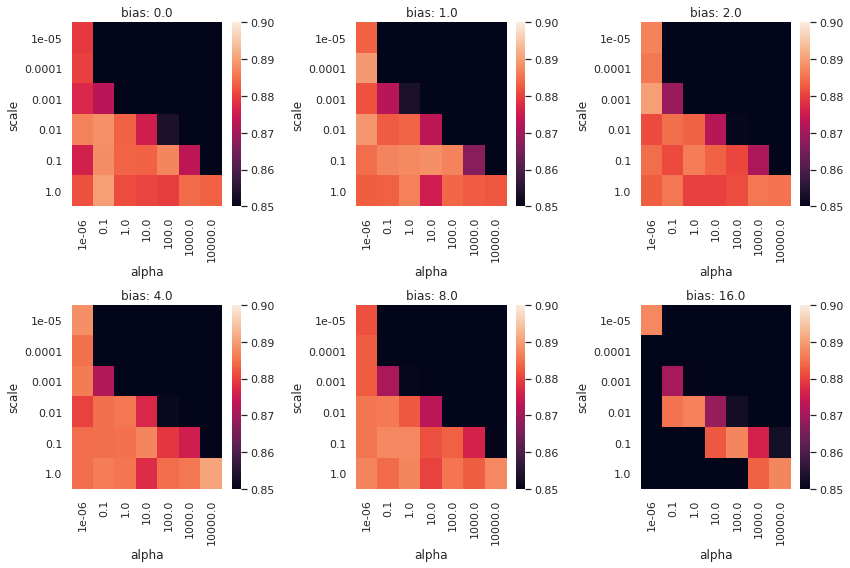

In [8]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)
plt.tight_layout()
plt.savefig('figures/sim_opu_2_fashion_mnist', format='pdf')

## OPU Degree 4

In [8]:
opu_degree_4 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_4.csv')

In [9]:
opu_degree_4.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
129,10.000000,16.0,4.0,10000.0,0.255293,opu,1.402319,1.000000e-04,0.8815,0.890667
59,0.100000,16.0,4.0,10000.0,0.251093,opu,1.353732,1.000000e+00,0.8816,0.888417
94,1.000000,16.0,4.0,10000.0,0.186762,opu,1.350705,1.000000e-02,0.8813,0.887750
45,0.100000,1.0,4.0,10000.0,0.184412,opu,1.407829,1.000000e-04,0.8754,0.887667
159,100.000000,4.0,4.0,10000.0,0.184051,opu,1.345986,1.000000e-04,0.8789,0.887667
22,0.000001,16.0,4.0,10000.0,0.185018,opu,1.354008,1.000000e-02,0.8762,0.887417
197,1000.000000,4.0,4.0,10000.0,0.186563,opu,1.351655,1.000000e+00,0.8770,0.887250
20,0.000001,16.0,4.0,10000.0,0.185169,opu,1.350130,1.000000e-06,0.8801,0.887000
190,1000.000000,1.0,4.0,10000.0,0.184295,opu,1.364938,1.000000e-02,0.8764,0.886833
232,10000.000000,4.0,4.0,10000.0,0.183589,opu,1.350311,1.000000e-02,0.8785,0.886667


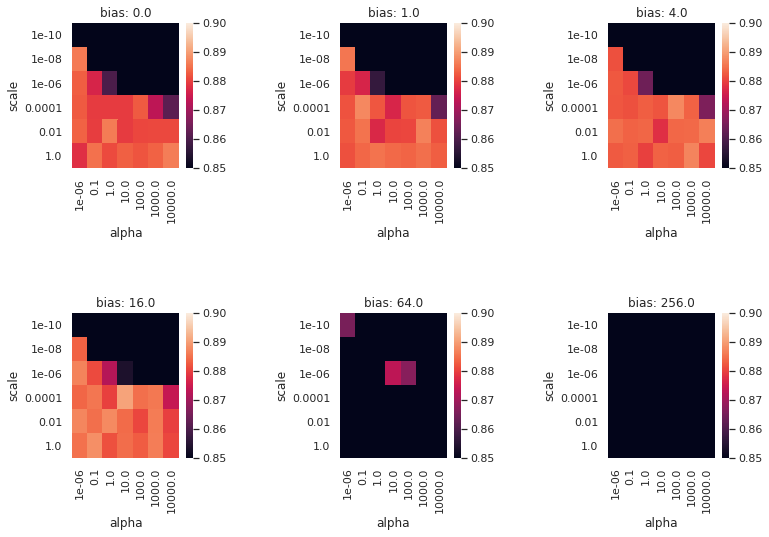

In [10]:
show_heatmaps(opu_degree_4, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

## OPU Degree 6

In [11]:
opu_degree_6 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_sim_opu_6.csv')

In [12]:
opu_degree_6.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,degree,num_features,proj_time,projection,regr_time,scale,test_score,val_score
128,10.000000,64.0,6.0,10000.0,0.184779,opu,1.360892,1.000000e-09,0.8791,0.891333
203,1000.000000,64.0,6.0,10000.0,0.183249,opu,1.364560,1.000000e+00,0.8781,0.890833
19,0.000001,64.0,6.0,10000.0,0.189411,opu,1.360804,1.000000e-12,0.8808,0.888250
131,10.000000,64.0,6.0,10000.0,0.270765,opu,1.383090,1.000000e+00,0.8811,0.888083
93,1.000000,64.0,6.0,10000.0,0.193974,opu,1.339203,1.000000e-06,0.8789,0.886833
58,0.100000,64.0,6.0,10000.0,0.207428,opu,1.333754,1.000000e-03,0.8795,0.886250
95,1.000000,64.0,6.0,10000.0,0.188120,opu,1.344012,1.000000e+00,0.8756,0.886250
20,0.000001,64.0,6.0,10000.0,0.187743,opu,1.340618,1.000000e-09,0.8796,0.886250
231,10000.000000,8.0,6.0,10000.0,0.191921,opu,1.392850,1.000000e-06,0.8757,0.886000
201,1000.000000,64.0,6.0,10000.0,0.187508,opu,1.348340,1.000000e-06,0.8770,0.885667


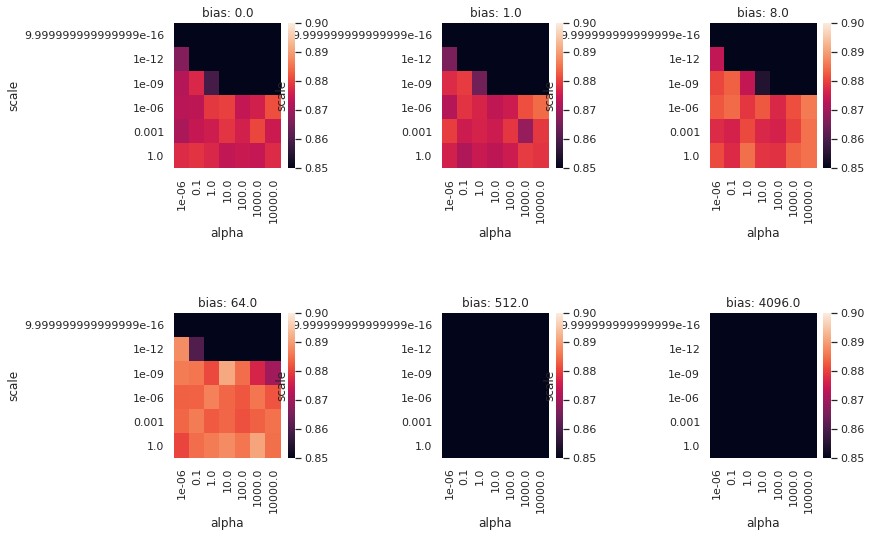

In [13]:
show_heatmaps(opu_degree_6, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)

## RBF

In [43]:
rbf = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_rbf_rff.csv')

In [44]:
rbf.sort_values(by='val_score', ascending=False)[:20]

,alpha,gamma,num_features,proj_time,projection,regr_time,scale,test_score,val_score
25,0.000001,0.003906,10000.0,0.110230,rbf,1.829300,0.01,0.8859,0.894667
188,0.001000,0.003906,10000.0,0.101337,rbf,1.750485,0.10,0.8832,0.894167
358,1.000000,0.007812,10000.0,0.101937,rbf,1.790624,10.00,0.8843,0.893917
231,0.010000,0.000977,10000.0,0.101777,rbf,1.728432,1.00,0.8800,0.893667
303,0.100000,0.007812,10000.0,0.136939,rbf,1.824980,1.00,0.8858,0.892167
412,10.000000,0.007812,10000.0,0.102961,rbf,1.775341,10.00,0.8843,0.892083
76,0.000010,0.001953,10000.0,0.135893,rbf,1.819077,10.00,0.8825,0.891500
85,0.000010,0.007812,10000.0,0.112641,rbf,1.834133,0.01,0.8861,0.891167
191,0.001000,0.003906,10000.0,0.104754,rbf,1.797947,100.00,0.8822,0.891083
143,0.000100,0.007812,10000.0,0.100864,rbf,1.782040,100.00,0.8818,0.890917


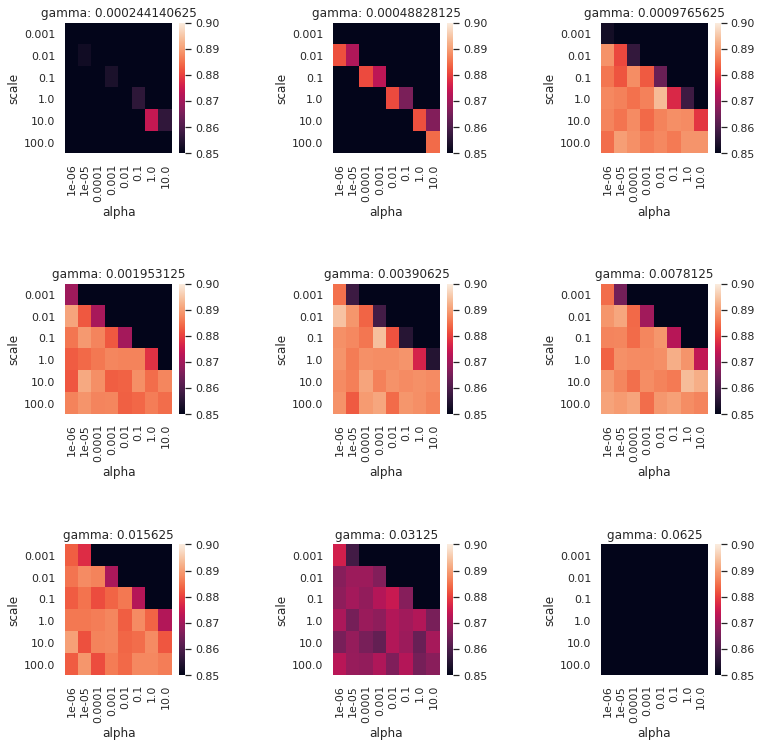

In [45]:
show_heatmaps(rbf, 'scale', 'alpha', 'gamma', vmin=0.85, vmax=0.9)

## Linear

In [5]:
linear = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_linear.csv')

In [6]:
linear.sort_values(by='val_score', ascending=False)[:20]

,alpha,bias,num_features,proj_time,projection,regr_time,scale,test_score,val_score
35,0.000001,16.0,10000.0,0.0,linear,0.022552,1.0000,0.8183,0.833083
22,0.000001,4.0,10000.0,0.0,linear,0.045527,0.1000,0.8187,0.832667
27,0.000001,8.0,10000.0,0.0,linear,0.019009,0.0100,0.8176,0.832333
46,0.100000,1.0,10000.0,0.0,linear,0.018403,0.1000,0.8173,0.831750
173,100.000000,8.0,10000.0,0.0,linear,0.019509,1.0000,0.8175,0.831417
19,0.000001,4.0,10000.0,0.0,linear,0.031692,0.0001,0.8163,0.831250
11,0.000001,1.0,10000.0,0.0,linear,0.018245,1.0000,0.8192,0.830583
29,0.000001,8.0,10000.0,0.0,linear,0.020002,1.0000,0.8183,0.830417
101,1.000000,8.0,10000.0,0.0,linear,0.019042,1.0000,0.8199,0.830083
47,0.100000,1.0,10000.0,0.0,linear,0.018377,1.0000,0.8187,0.829750


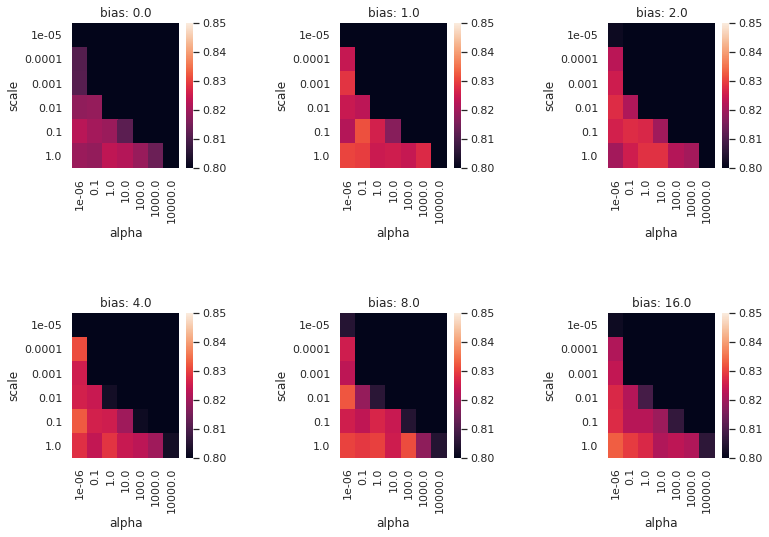

In [7]:
show_heatmaps(linear, 'scale', 'alpha', 'bias', vmin=0.80, vmax=0.85)

# Real OPU Degree 2

## Bias 0

In [29]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_2_bias_0.csv')

In [30]:
opu_degree_2.sort_values(by='val_score', ascending=False)

,alpha,bias,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
3,0.000001,0.0,10000.0,1.0,10.064472,opu_physical,0.0,80.441534,0.01000,0.8759,0.885833
22,10.000000,0.0,10000.0,1.0,9.612400,opu_physical,0.0,84.054766,0.10000,0.8766,0.885750
5,0.000001,0.0,10000.0,1.0,9.657494,opu_physical,0.0,80.058685,1.00000,0.8748,0.884750
11,0.100000,0.0,10000.0,1.0,9.621937,opu_physical,0.0,83.600041,1.00000,0.8726,0.882500
10,0.100000,0.0,10000.0,1.0,9.552360,opu_physical,0.0,79.016253,0.10000,0.8754,0.881750
4,0.000001,0.0,10000.0,1.0,10.116150,opu_physical,0.0,80.532590,0.10000,0.8732,0.881583
29,100.000000,0.0,10000.0,1.0,10.477879,opu_physical,0.0,81.604410,1.00000,0.8746,0.881250
35,1000.000000,0.0,10000.0,1.0,9.695587,opu_physical,0.0,81.531450,1.00000,0.8760,0.880833
1,0.000001,0.0,10000.0,1.0,9.659919,opu_physical,0.0,79.870037,0.00010,0.8755,0.880500
9,0.100000,0.0,10000.0,1.0,9.849769,opu_physical,0.0,82.489359,0.01000,0.8753,0.879917


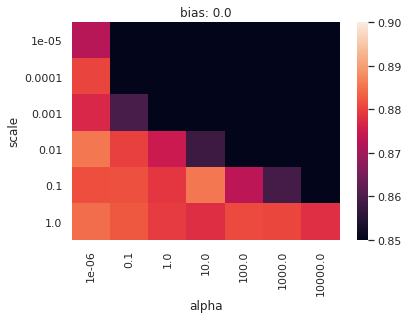

In [31]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.85, vmax=.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)

## Bias 1

In [26]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_2_bias_1.csv')

In [27]:
opu_degree_2.sort_values(by='val_score', ascending=False)

,alpha,bias,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
9,0.100000,0.0,10000.0,1.0,12.244657,opu_physical,0.0,190.238848,0.01000,0.8724,0.883917
2,0.000001,0.0,10000.0,1.0,10.878552,opu_physical,0.0,84.253500,0.00100,0.8712,0.882833
35,1000.000000,0.0,10000.0,1.0,10.362763,opu_physical,0.0,103.412270,1.00000,0.8735,0.882167
0,0.000001,0.0,10000.0,1.0,10.638497,opu_physical,0.0,88.435064,0.00001,0.8680,0.881250
29,100.000000,0.0,10000.0,1.0,12.577424,opu_physical,0.0,104.717690,1.00000,0.8762,0.881083
22,10.000000,0.0,10000.0,1.0,11.432052,opu_physical,0.0,88.436936,0.10000,0.8721,0.881000
1,0.000001,0.0,10000.0,1.0,10.381029,opu_physical,0.0,84.933161,0.00010,0.8708,0.881000
3,0.000001,0.0,10000.0,1.0,10.641538,opu_physical,0.0,80.032846,0.01000,0.8713,0.880833
4,0.000001,0.0,10000.0,1.0,10.989336,opu_physical,0.0,85.212145,0.10000,0.8718,0.880167
17,1.000000,0.0,10000.0,1.0,10.609688,opu_physical,0.0,132.435702,1.00000,0.8714,0.880167


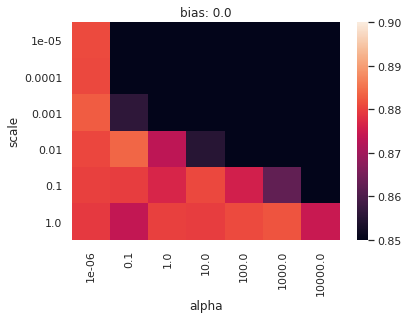

In [28]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)

## Bias 4

In [35]:
opu_degree_2 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_2_bias_4.csv')

In [36]:
opu_degree_2.sort_values(by='val_score', ascending=False)

,alpha,bias,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
35,1000.000000,0.0,10000.0,1.0,10.871328,opu_physical,0.0,82.370415,1.00000,0.8739,0.885750
17,1.000000,0.0,10000.0,1.0,10.992228,opu_physical,0.0,78.434979,1.00000,0.8745,0.883500
1,0.000001,0.0,10000.0,1.0,9.131671,opu_physical,0.0,83.148006,0.00010,0.8755,0.883333
5,0.000001,0.0,10000.0,1.0,9.980933,opu_physical,0.0,80.044837,1.00000,0.8726,0.882667
16,1.000000,0.0,10000.0,1.0,10.639451,opu_physical,0.0,83.038712,0.10000,0.8745,0.882583
22,10.000000,0.0,10000.0,1.0,10.769110,opu_physical,0.0,80.613407,0.10000,0.8772,0.881833
23,10.000000,0.0,10000.0,1.0,10.239676,opu_physical,0.0,83.114191,1.00000,0.8707,0.881000
4,0.000001,0.0,10000.0,1.0,10.139436,opu_physical,0.0,80.729940,0.10000,0.8720,0.878667
3,0.000001,0.0,10000.0,1.0,11.727180,opu_physical,0.0,84.968053,0.01000,0.8703,0.878583
9,0.100000,0.0,10000.0,1.0,10.299008,opu_physical,0.0,75.200715,0.01000,0.8757,0.878583


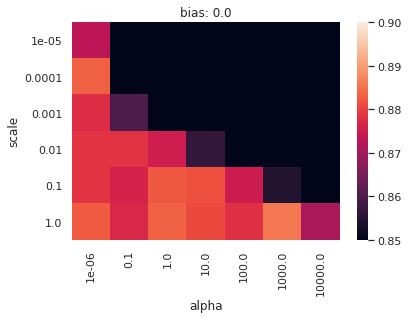

In [37]:
show_heatmaps(opu_degree_2, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)

## Real OPU degree 4

### Bias 0

In [5]:
opu_degree_4 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_4_bias_0.csv')

In [6]:
opu_degree_4.sort_values(by='val_score', ascending=False)

,alpha,bias,degree,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
23,10.000000,0.0,4.0,10000.0,1.0,8.632010,opu_physical,0.0,20.201097,1.000000e+00,0.8717,0.884500
9,0.100000,0.0,4.0,10000.0,1.0,8.505817,opu_physical,0.0,19.962145,1.000000e-04,0.8717,0.884333
16,1.000000,0.0,4.0,10000.0,1.0,8.473826,opu_physical,0.0,21.096750,1.000000e-02,0.8734,0.881500
3,0.000001,0.0,4.0,10000.0,1.0,8.498130,opu_physical,0.0,21.274963,1.000000e-04,0.8735,0.881500
10,0.100000,0.0,4.0,10000.0,1.0,7.991619,opu_physical,0.0,18.113488,1.000000e-02,0.8737,0.881167
22,10.000000,0.0,4.0,10000.0,1.0,10.272050,opu_physical,0.0,22.513895,1.000000e-02,0.8722,0.881000
28,100.000000,0.0,4.0,10000.0,1.0,8.600949,opu_physical,0.0,22.512420,1.000000e-02,0.8716,0.880500
35,1000.000000,0.0,4.0,10000.0,1.0,8.518534,opu_physical,0.0,21.189293,1.000000e+00,0.8714,0.880333
15,1.000000,0.0,4.0,10000.0,1.0,8.027424,opu_physical,0.0,19.747904,1.000000e-04,0.8739,0.879917
27,100.000000,0.0,4.0,10000.0,1.0,8.533861,opu_physical,0.0,23.029609,1.000000e-04,0.8718,0.879750


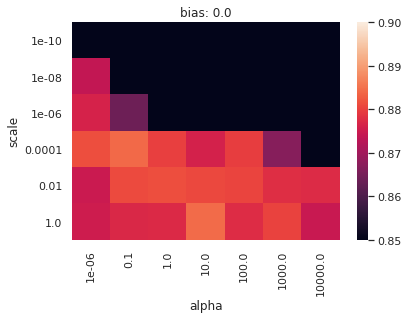

In [7]:
show_heatmaps(opu_degree_4, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)

### Bias 1

In [8]:
opu_degree_4 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_4_bias_1.csv')

In [9]:
opu_degree_4.sort_values(by='val_score', ascending=False)

,alpha,bias,degree,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
41,10000.000000,0.0,4.0,10000.0,1.0,7.997691,opu_physical,0.0,18.612760,1.000000e+00,0.8713,0.882333
16,1.000000,0.0,4.0,10000.0,1.0,8.026234,opu_physical,0.0,20.479200,1.000000e-02,0.8709,0.881250
28,100.000000,0.0,4.0,10000.0,1.0,7.976766,opu_physical,0.0,18.986056,1.000000e-02,0.8731,0.881000
23,10.000000,0.0,4.0,10000.0,1.0,8.553669,opu_physical,0.0,23.603612,1.000000e+00,0.8731,0.880917
40,10000.000000,0.0,4.0,10000.0,1.0,7.936684,opu_physical,0.0,23.301648,1.000000e-02,0.8701,0.880667
34,1000.000000,0.0,4.0,10000.0,1.0,7.962517,opu_physical,0.0,20.340952,1.000000e-02,0.8726,0.880583
4,0.000001,0.0,4.0,10000.0,1.0,7.924709,opu_physical,0.0,19.443872,1.000000e-02,0.8720,0.880583
22,10.000000,0.0,4.0,10000.0,1.0,7.975439,opu_physical,0.0,18.193892,1.000000e-02,0.8722,0.880250
10,0.100000,0.0,4.0,10000.0,1.0,10.087576,opu_physical,0.0,18.729342,1.000000e-02,0.8714,0.879750
15,1.000000,0.0,4.0,10000.0,1.0,8.006249,opu_physical,0.0,18.872037,1.000000e-04,0.8740,0.879583


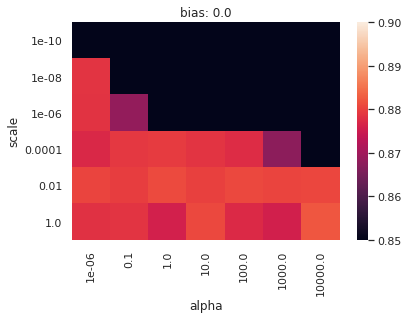

In [10]:
show_heatmaps(opu_degree_4, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)

### Bias 4

In [11]:
opu_degree_4 = pd.read_csv('csv/hyperparameter_optimization/FashionMNIST_real_opu_4_bias_4.csv')

In [12]:
opu_degree_4.sort_values(by='val_score', ascending=False)

,alpha,bias,degree,num_features,precomputed,proj_time,projection,raw_features,regr_time,scale,test_score,val_score
4,0.000001,0.0,4.0,10000.0,1.0,8.426296,opu_physical,0.0,22.548315,1.000000e-02,0.8707,0.885083
3,0.000001,0.0,4.0,10000.0,1.0,7.802657,opu_physical,0.0,20.342421,1.000000e-04,0.8705,0.883833
16,1.000000,0.0,4.0,10000.0,1.0,8.385016,opu_physical,0.0,21.249428,1.000000e-02,0.8729,0.883750
28,100.000000,0.0,4.0,10000.0,1.0,7.916102,opu_physical,0.0,18.028969,1.000000e-02,0.8718,0.883667
2,0.000001,0.0,4.0,10000.0,1.0,8.604294,opu_physical,0.0,19.111755,1.000000e-06,0.8708,0.882083
40,10000.000000,0.0,4.0,10000.0,1.0,8.001061,opu_physical,0.0,19.607665,1.000000e-02,0.8725,0.882083
23,10.000000,0.0,4.0,10000.0,1.0,7.967141,opu_physical,0.0,20.631903,1.000000e+00,0.8711,0.881500
34,1000.000000,0.0,4.0,10000.0,1.0,8.456573,opu_physical,0.0,20.246201,1.000000e-02,0.8724,0.881417
9,0.100000,0.0,4.0,10000.0,1.0,7.890626,opu_physical,0.0,19.959951,1.000000e-04,0.8710,0.880250
15,1.000000,0.0,4.0,10000.0,1.0,8.399907,opu_physical,0.0,18.577372,1.000000e-04,0.8709,0.880250


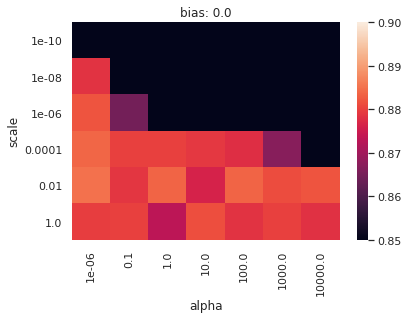

In [13]:
show_heatmaps(opu_degree_4, 'scale', 'alpha', 'bias', vmin=0.85, vmax=0.9)
# => we need stronger regularization for the physical device! otherwise, cholesky does not succeed!
# this may be due to the truncated feature spectrum! (quantization)